# 3. hét / Prológus

A mai órán a következő témákról lesz szó:
- Feltételes elágazások: megismerkedünk a feltételes utasításokkal, azaz olyan kódrészleteket írunk, amelyek csak bizonyos feltételek teljesülésekor futnak le. ~ (10 perc)
- Szimbolikus számítások sympy segítségével: megismerkedünk egy új csomaggal, amely alapvetően lehetőséget ad szimbólumokkal/változókkal való számolásra, így például egyenletek/egyenletrendszerek megoldására, kifejezések átrendezésére és még sok másra!

# 3. hét / I. Feltételes (if) utasítások

Programozás során gyakran szükség van arra, hogy bizonyos utasítások/utasítás sorozatok csak *egy adott feltétel esetén menjenek végbe*. Ezért a legtöbb programozási nyelv tartalmaz úgynevezet *feltételes elágazásokat*. A Python nyelvben a következő módon tudunk feltételes elágazást létrehozni:
```
if(<feltétel>):
    <utasítás1>
    <utasítás2>...
else:
    <utasítás3>
    <utasítás4>...
```
Ekkor az `<utasítás1>`, `<utasítás2>`... csak akkor fog lefutni, ha a `<feltétel>` igaz. Ha pedig a feltétel nem teljesül, akkor az `<else>` ág fog lefutni. (Az else ágat egyébként nem muszáj megírni) Nézzünk erre egy példát, ahol két szám közül eldöntjük, hogy melyik a nagyobb:

In [1]:
# Definiáljuk a két számot:
a,b = 2,5

# Ha a nagyobb, mint b...
if(a>b):
    print("Az a nagyobb, mint a b")
# Ha a egyenlő b-vel
if(a == b):
    print("Az a és b egyenlő")

# Ha a kisebb, mint b
    print("Az a kisebb, mint a b")

Megadhatunk akár összetett feltételeket is a következő módon:
- *ÉS kapcsolat*: `<feltetel1> and <feltetel2>` esetén mindkét feltételnek teljesülnie kell
- *VAGY kapcsolat*: `<feltetel1> or <feltetel2>` esetén legalább az egyik feltételnek teljesülnie kell

Nézzünk egy-egy példát ezekre! Definiáljunk 3 változót és nézzük meg, hogy:
- A három megadott szám megegyezik-e?
- Van legalább kettő ami megegyezik?

Figyelem! Két számot mindig az `==` operátorral hasonlítunk össze! Az `if(a=b)` helytelen, ugyanis az `=` operátor az értékeadás operátor, ezért az `a` értékét a `b`-vel teszi egyenlővé, ahelyett, hogy összehasonlítaná őket!

In [231]:
# Definiáljunk 3 változót:
a,b,c = 1,2,3
if(a == b and b == c):
    print("Mindhárom szám egyenlő egymással")
if(a == b or b == c or a == c):
    print("Van legalább két azonos szám")

Ha az `else` ágba is szeretnénk tenni további feltételeket, ekkor használjuk az `elif(<feltétel>):` formátumot!  
Például nézzük meg, hogy egy adott szám pozitív, negatív, avagy nulla!

In [238]:
# Definiáljuk a változót
a = -5

# Ha 'a' pozitív...
if(a>0):
    print("Az a szám pozitív")

# Ha nem pozitív, akkor még lehet 0, vagy negatív...
elif(a==0):
    print("Az a szám nulla")

# Ha az a se nem pozitív, se nem 0, akkor muszáj negatívnak lennie
else:
    print("Az a szám negatív")


Az a szám negatív


# 3. hét / II. Mechanikai példa megoldása Python (Sympy) segítségével

## Feladatkitűzés

Az alábbi tartónál a megengedett maximális normálfeszültség 6 [MPa]. Határozzuk meg a tartó $d$ átmérőjét úgy, hogy az hajlításra megfeleljen!

![](fig1.png)

Adatok: $L_1,\,L_2,\,F,\,p,\,\sigma_{meg},\,a,\,b,\,c$

Importok és inicializálás: `numpy`, `sympy`

In [139]:
import numpy as np
import sympy as sp
from IPython.display import Math
import matplotlib.pyplot as plt

sp.init_printing()

Készítsük el a szimbolikus karaktereket, amelyekkel majd a képleteinkben számolunk!
Ehhez az `sp.symbols()` függvényt és `dictionary` formát használjuk!

In [110]:
# A szimbolikus változók létrehozása
L_1, L_2, F, p, σ, a, b, c = sp.symbols("L_1,L_2,F,p,σ,a,b,c")
# A számértékek hozzárendelése
adatok = [(L_1, 4),(L_2, 2),(F,12),(p,8),(σ,6),(b,75),(a,175),(c,25)]

## 1. feladat: A reakcióerők meghatározása
Oldjuk meg az alábbi egyenletrendszert:
$\begin{equation} \sum F_x = 0 \quad A_x = 0 \tag{1.1}\end{equation}$
$\begin{equation} \sum F_y = 0 \quad A_y+B_y-pL_1-F = 0 \tag{1.2}\end{equation}$
$\begin{equation} \sum M_A = 0 \quad B_yL_1 - F(L_1+L_2)-\dfrac{pL_1^2}{2}=0 \tag{1.3}\end{equation}$
A közönséges egyenletek megoldásához használhatjuk a `sp.solve(<egyenlet>, <ismeretlen>)` függvényt. Fontos, hogy az `<egyenlet>` **0-ra rendezett** (redukált) formában kell, hogy szerepeljen.
Nézzünk is meg erre egy példát!

A (3)-as egyenlet már önmagában 0-ra redukált formában szerepel, ezért:  
`<egyenlet>` -> `B_y*L_1-F*(L_1+L_2)-(p*L_1**2)/2`  
`<ismeretlen>` -> `B_y`

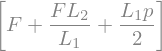

In [117]:
# Oldjuk meg a (3)-as egyenletet!
B_y = sp.symbols("B_y")
sp.solve(B_y*L_1-F*(L_1+L_2)-p*L_1**2/2,B_y)

Miután lefuttatjuk a `sp.solve()` függvényt, megkapjuk formálisan/szimbolikusan a végeredményt. *Milyen típusú adatot ad vissza a `sp.solve()` függvény?*  *Mit tudunk tenni annak érdekében, hogy tudjunk vele dolgozni?*

Ha szeretnénk behelyettesíteni a kapott kifejezésbe, akkor a `.subs(<adatok>)` metódussal ezt megtehetjük!

<span style="color:teal">*Megjegyzés: a metódusokról még nem volt behatóan szó, had vetítsem előre a következő hét anyagát.Minden olyan függvényt, amelyet csak egy bizonyos osztályhoz társítunk,* **metódusnak** *nevezünk. A metódusok azok ugyanolyan függvények, mint amelyekkel már korábban találkoztunk, ugyanazt a szerepet is töltik be, viszont ezek csak bizonyos osztályok példányain, adattagjain hívhatóak meg. Úgy kell ezt elképzelni, mintha "csak bizonyos objektumokra lenne értelmezve/definiálva egy függvény". Ezért van az, hogy `<adattag>.<metódus>` szintaktikával hívhatjuk meg ezeket, ugyanis önmagukban nincs értelmük! Például egy matematikai kifejezésen meghívni a `.subs()` metódust van értelme, abba be tudunk helyettesíteni, de ha egy változóba eltárolok egy URL-t, egy linket, abba nincs értelme "behelyettesíteni", ezért nem is lehet rajta meghívni ezt a metódust.* </span>


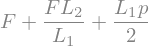

A B_y erő nagysága: 34 [kN]


In [118]:
# Válasszuk ki a B_y-hoz tartozó kifejezést ~ egy 1 elemű tömb első eleme
B_y = sp.solve(B_y*L_1-F*(L_1+L_2)-p*L_1**2/2,B_y)[0]
display(B_y)

# Helyettesítsünk be!
B_yn = B_y.subs(adatok)
print("A B_y erő nagysága: " + str(B_yn) + " [kN]")

# Az adatokhoz ezt követően adjuk hozzá a B_y-t!
adatok.append((B_y,B_yn))

Hasonló módszerrel most határozzuk meg az $A_y$ erőt is!

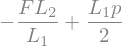

Az A_y erő nagysága: 10 [kN]


In [119]:
# Oldjuk meg a (2)-es egyenletet az sp.solve() segítségével!
A_y = sp.symbols("A_y")
A_y = sp.solve(A_y+B_y-p*L_1-F,A_y)[0]
display(A_y)

# Helyettesítsünk be és adjuk hozzá az adatokhoz A_y értékét!
A_yn = A_y.subs(adatok)
adatok.append((A_y,A_yn))
print("Az A_y erő nagysága: " + str(A_yn) + " [kN]")

A fenti módszerrel látjuk, hogy nagyon könnyen megoldhatóvá válik egy egyenletrendszer, de alapvetően itt kihasználtuk, hogy a harmadik egyenlet *csak egy ismeretlent tartalmazott*, ezért egyesével vissza tudtuk fejteni a megoldást. A sympy természetesen lehetőséget kínál bonyolultabb rendszerek megoldására is.

**Lineáris rendszerek** esetén két módszer is rendelkezésünkre áll. Csinálhatjuk azt, hogy a 0-ra redukált rendszert egy `rendszer = [<egyenlet1>,<egyenlet2>,...]` tömbben eltároljuk, míg az ismeretleneket egy `ismeretlenek = [<ismeretlen1>,<ismeretlen2>,...]` tömbben. Majd meghívva az `sp.linsolve(<rendszer>,<ismeretlenek>)` függvényt, az ismeretlenek sorrendjében megkapjuk az eredményt.   

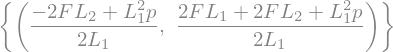

In [122]:
# Oldjuk meg a lineáris rendszert az sp.linsolve() függvény segítségével!
A_y, B_y = sp.symbols("A_y,B_y")
rendszer = [A_y+B_y-p*L_1-F,B_y*L_1-F*(L_1+L_2)-p*L_1**2/2]
ismeretlenek = [A_y,B_y]
display(sp.linsolve(rendszer,ismeretlenek))
display(sp.linsolve(rendszer,ismeretlenek).subs(adatok))

Emellett gyakran előfordul, hogy a lineáris rendszereket mátrixos formában írjuk fel. Nézzük is meg az eredeti egyenletrendszert mátrixos formában:
$\begin{equation}\underbrace{\begin{bmatrix} 1 & 1 \\ 0 & L_1\end{bmatrix}}_{=\mathbf{A}}\begin{bmatrix}A_y \\ B_y \end{bmatrix} = \underbrace{\begin{bmatrix} pL_1+F \\ F(L_1+L_2)+\dfrac{pL_1^2}{L_2} \end{bmatrix}}_{=\mathbf{b}}  \tag{1.4}\end{equation}$
Ekkor az `A` változóba az együtthatómátrixot és a `b` változóba konstansokból képzett vektort, a `Matrix()` függvény segítségével tudjuk felírni. Az egyenletrendszert a `linsolve((<A>,<b>),[<ismeretlen1>,<ismeretlen2>],...)` függvénnyel kapjuk.


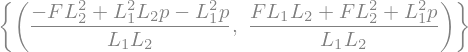

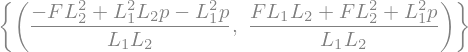

In [224]:
# Töltsük fel az együtthatómátrixot és a konstansokból képzett vektort
A_rendszer = sp.Matrix([[1,1],[0,L_1]])
b_rendszer = sp.Matrix([[p*L_1+F],[F*(L_1+L_2)+p*L_1**2/L_2]])

# Definiáljuk a rendszert, és megoldjuk az egyenletrendszert
rendszer = (A_rendszer,b_rendszer)
display(sp.linsolve(rendszer,[A_y, B_y]))
display(sp.linsolve(rendszer,[A_y, B_y]).subs(adatok))

<span style="color:teal"> *Megjegyzés: természetesen mi csak egy nagyon szűk szeletét tekintettük át az egyenletek megoldásának. A sympy egy lényegesen erősebb matematikai apparátussal rendelkezik, ezért képes elbánni egyenlőtlenségekkel, nemlineáris egyeneltrendszerekkel (`sp.nonlinsolve(<rendszer>,[<ismeretlenek>])`), a közönséges, sőt még a parciális differenciálegyenletek egy jelentős részével is! Ezekről bővebben: https://docs.sympy.org/latest/modules/solvers/solvers.html*</span>

## 2. feladat: Igénybevételi függvények ábrázolása
Osszuk két szakaszra a rudat:
$\begin{equation} I.\quad x\in(0,L_1)\quad\quad\quad II. \quad x\in(L_1,L_1+L_2)\tag{2.1}\end{equation}$
Ekkor az igénybevételi függvények:
$\begin{align} V_1(x)&=A_y-px & V_2(x)&=F \tag{2.2}\\  M_{h1}(x)&=-A_yx+\dfrac{px^2}{2} & M_{h2}(x)&=F(L_1+L_2-x)\tag{2.3}\end{align}$
Ábrázoljuk a fenti függvényeket és keressük meg a hajlítás szempontjából veszélyes keresztmetszetet!

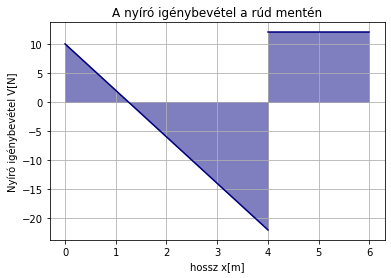

In [207]:
# Készítsük el az x és y pontjainkat!
x1 = np.linspace(0.0,float(L_1.subs(adatok)),2)
y1 = float(A_yn)-float(p.subs(adatok))*x1
x2 = np.linspace(float(L_1.subs(adatok)),float((L_1+L_2).subs(adatok)),2)
y2 = float(F.subs(adatok))+x2*0

# Ezt követően plotoljuk a pontokat!
fig, ax = plt.subplots()                            # Subplotok elkészítése
ax.plot(x1,y1,color="navy")                         # Grafikon/1
ax.fill_between(x1,y1,color="navy",alpha=0.5)       # Kitöltés/1
ax.plot(x2,y2,color="navy")                         # Grafikon/2
ax.fill_between(x2,y2,color="navy",alpha=0.5)       # Kitöltés/2
ax.set_xlabel('hossz x[m]')                         # x-tengely felirat
ax.set_ylabel('Nyíró igénybevétel V[N]')            # y-tengely felirat
ax.set_title('A nyíró igénybevétel a rúd mentén')   # Cím
ax.grid(True)                                       # Bekapcsoljuk a gridet

plt.show()
#fig.savefig("plot1.jpg",dpi=300)

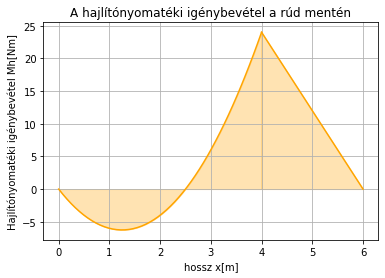

In [212]:
# Készítsük el az x és y pontjainkat!
x1 = np.linspace(0.0,float(L_1.subs(adatok)),50)
y1 = -float(A_yn)*x1+float(p.subs(adatok))*x1**2/2
x2 = np.linspace(float(L_1.subs(adatok)),float((L_1+L_2).subs(adatok)),50)
y2 = float(F.subs(adatok))*(float((L_1+L_2).subs(adatok))-x2)

# Ezt követően plotoljuk a pontokat!
fig, ax = plt.subplots()                            # Subplotok elkészítése
ax.plot(x1,y1,color="orange")                       # Grafikon/1
ax.fill_between(x1,y1,color="orange",alpha=0.3)     # Kitöltés/1
ax.plot(x2,y2,color="orange")                       # Grafikon/2
ax.fill_between(x2,y2,color="orange",alpha=0.3)     # Kitöltés/2
ax.set_xlabel('hossz x[m]')                         # x-tengely felirat
ax.set_ylabel('Hajlítónyomatéki igénybevétel Mh[Nm]') # y-tengely felirat
ax.set_title('A hajlítónyomatéki igénybevétel a rúd mentén')   # Cím
ax.grid(True)                                       # Bekapcsoljuk a gridet

plt.show()
fig.savefig("plot2.jpg",dpi=300)

## 3. feladat - A $d$ paraméter meghatározása
Tudjuk, hogy a $d$ paraméternek az alábbi egyenletet kell kielégítenie, hogy szilárdságtanilag biztonságos legyen a szerkezet:
$\begin{equation}\dfrac{25}{3}\cdot d^2+9375\cdot d-1406250+70312500\cdot\dfrac{1}{d} > 4000000\tag{3.1}\end{equation}$
Viszont a valóságban nem feltétlenül szeretnénk, ha csak egy kicsivel lennénk a megadott, szilárdságtani határ felett, ezért amíg a megadott 4000000-et legalább 10%-kal nem lépjük túl, mondjuk azt, hogy csak *éppen stabil* a rendszer.
Írjunk egy *függvényt*, amellyel eldönthetjük egy adott $d$ paraméterről, hogy megfelel-e (a függvény visszatérési értéke legyen egy `string`, amely tartalmazza az információt); és írassuk ki az alábbi értékek esetén a döntést:
- $d=247.15\;[\text{mm}]$
- $d=409.38\;[\text{mm}]$
- $d=533.96\;[\text{mm}]$


In [219]:
# Definiáljunk egy függvényt, melynek bemenő paramétere a d!
def meretezes(d):
    # Ha a szerkezet teljesen stabil:
    if(25/3*d**2+9375*d-1406250+70312500/d > 4000000*1.1):
        return "A d = " + str(d) + " [mm] méretre a szerekezet stabil."
    # Ha a szerkezet instabil:
    elif(25/3*d**2+9375*d-1406250+70312500/d > 4000000):
        return "A d = " + str(d) + " [mm] méretre a szerekezet még éppen stabil."
    # Minden más esetben instabil
    else:
        return "A d = " + str(d) + " [mm] méretre a szerekezet nem stabil."

print(meretezes(247.15))
print(meretezes(409.38))
print(meretezes(533.96))


A d = 247.15 [mm] méretre a szerekezet nem stabil.
A d = 409.38 [mm] méretre a szerekezet még éppen stabil.
A d = 533.96 [mm] méretre a szerekezet stabil.


# 3.hét / Epilógus

### Hasznos anyagok:

- Dokumentációk
    - Python hivatalos dokumentációja: https://docs.python.org/3/
    - [PEP 8](https://peps.python.org/pep-0008/) Style Guide for Python Code - Melyek a jó és rossz programozási praktikák
    - NumPy hivatalos dokumentációja: https://numpy.org/doc/1.25/
- Tankönyvek
    - [Dive Into Python 3](http://diveintopython3.problemsolving.io/)
    - [Dive into Deep Learning](https://d2l.ai/) - Interaktív tankönyv Deep Learninghez
    - [Fluent Python: Clear, Concise, and Effective Programming by Luciano Ramalho](https://www.oreilly.com/library/view/fluent-python/9781491946237/) - Haladóbb szemléletű Python programozás
- Útmutatók
    - [The Official Python Tutorial](https://docs.python.org/3/tutorial/) - Self-explanatory?
    - [Foglalt Keyword lista](https://docs.python.org/3.0/reference/lexical_analysis.html#id8) - Ezeket ne használd változónévnek!
    - [Codecademy](https://www.codecademy.com/catalog) - Interaktív (fizetős) online tutorial
    - [CheckIO](https://py.checkio.org/) - Tanulj Pythont játékfejlesztésen kersztül
- Competitive Programming
    - [Codewars](https://www.codewars.com/?language=python)
    - [CodeForces](https://codeforces.com/)

### Elérhetőség

Bármilyen kérdés, kérés vagy probléma esetén keressetek minket az alábbi elérhetőségeken:
- Monori Bence - m.bence02@outlook.hu
- Wenesz Dominik - weneszdominik@gmail.com

Illetve anonim üzenetküldésre is lehetőséget biztosítunk, ezt az alábbi linken tudjátok elérni: https://forms.gle/6VtGvhja3gq6CTT66